In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

zadsanie 1

In [5]:
import pandas as pd
print("\nData types before conversion:")
print(X.dtypes)

categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
for col in categorical_cols:
    if col in X.columns:
        X[col] = X[col].astype('category')

print("\nData types after conversion:")
print(X.dtypes)

data = pd.concat([X, y], axis=1)

print("\nMissing values before dropping:")
print(data.isnull().sum())

data_cleaned = data.dropna()

print("\nMissing values after dropping:")
print(data_cleaned.isnull().sum())

X_cleaned = data_cleaned.drop(columns=y.columns)
y_cleaned = data_cleaned[y.columns]

print(f"\nOriginal number of rows: {len(data)}")
print(f"Number of rows after dropping missing values: {len(data_cleaned)}")



Data types before conversion:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Data types after conversion:
age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope       category
ca          category
thal        category
dtype: object

Missing values before dropping:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing values after dropping:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalac

<ipython-input-5-01d79e9c2639>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


zadanie 2


Rozkład wartości w kolumnie num (Target):
num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


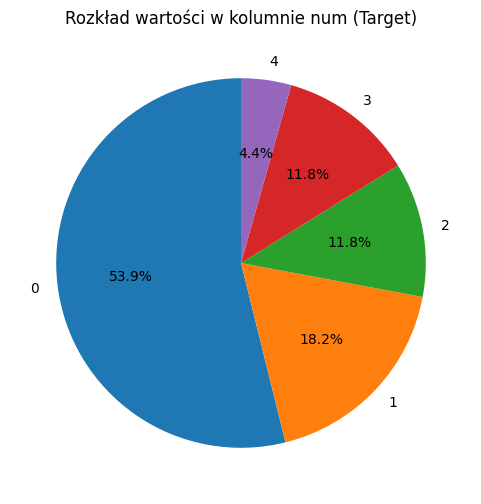


Czy dane są zbalansowane? Raczej nie, jedna klasa ma znacznie więcej obserwacji niż druga.

Podstawowa statystyka opisowa dla cech numerycznych:
              age         sex    trestbps        chol         fbs     thalach  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768  131.693603  247.350168    0.144781  149.599327   
std      9.049736    0.468500   17.762806   51.997583    0.352474   22.941562   
min     29.000000    0.000000   94.000000  126.000000    0.000000   71.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000  133.000000   
50%     56.000000    1.000000  130.000000  243.000000    0.000000  153.000000   
75%     61.000000    1.000000  140.000000  276.000000    0.000000  166.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000  202.000000   

            exang     oldpeak  
count  297.000000  297.000000  
mean     0.326599    1.055556  
std      0.469761    1.16612

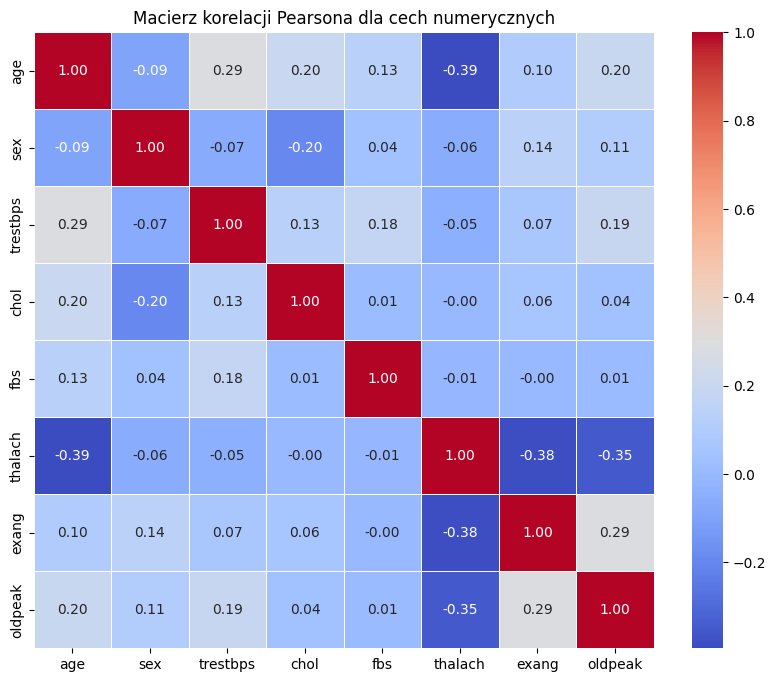


Trzy najbardziej skorelowane cechy względem cechy age (wartość bezwzględna):
thalach     0.394563
trestbps    0.290476
chol        0.202644
Name: age, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

target_distribution = y_cleaned['num'].value_counts()
print("\nRozkład wartości w kolumnie num (Target):")
print(target_distribution)

plt.figure(figsize=(6, 6))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Rozkład wartości w kolumnie num (Target)')
plt.show()

print("\nCzy dane są zbalansowane? Raczej nie, jedna klasa ma znacznie więcej obserwacji niż druga.")

numerical_features = X_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("\nPodstawowa statystyka opisowa dla cech numerycznych:")
print(X_cleaned[numerical_features].describe())

categorical_features = X_cleaned.select_dtypes(include=['category']).columns
print("\nDominanta (moda) dla cech kategorialnych:")
for col in categorical_features:
    print(f"{col}: {X_cleaned[col].mode()[0]}")

numerical_data = data_cleaned[numerical_features]
correlation_matrix = numerical_data.corr(method='pearson')
print("\nMacierz korelacji Pearsona dla cech numerycznych:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji Pearsona dla cech numerycznych')
plt.show()

if 'age' in correlation_matrix.columns:
    age_correlations = correlation_matrix['age'].abs().sort_values(ascending=False)
    age_correlations = age_correlations.drop(['age', 'num'] if 'num' in age_correlations.index else 'age')

    print("\nTrzy najbardziej skorelowane cechy względem cechy age (wartość bezwzględna):")
    print(age_correlations.head(3))
else:
    print("\nKolumna 'age' nie istnieje w macierzy korelacji numerycznych cech.")

zadanie 3

In [8]:
pip install ucimlrepo

In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [11]:
#zadanie 4

import pandas as pd

data_adult['age_group'] = pd.cut(
    data_adult['age'],
    bins=[0, 40, float('inf')],
    labels=['< 40', '>= 40'],
    right=False
)

if data_adult['age_group'].isnull().any():
    print("Warning: Some rows resulted in NaN for age_group. This might happen if age is outside defined bins or NaN.")
    print(data_adult[data_adult['age_group'].isnull()])

if 'income' not in data_adult.columns:
    print("Error: 'income' column not found in the dataframe. Please check the column name.")
else:

    contingency_table = pd.crosstab(data_adult['age_group'], data_adult['income'])

    print("\nContingency Table (Age Group vs Income):")
    print(contingency_table)

    chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-square Test Results (Age Group vs Income):")
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value_chi2:.4f}")
    print(f"Degrees of freedom: {dof}")

    alpha_chi2 = 0.05
    print(f"Significance level (alpha): {alpha_chi2}")

    if p_value_chi2 < alpha_chi2:
        print(f"\nDecision: Reject the null hypothesis.")
        print("Conclusion: There is a statistically significant association between age group and income level.")
        print(f"This suggests that income distribution is different for people aged < 40 compared to those aged >= 40.")
    else:
        print(f"\nDecision: Fail to reject the null hypothesis.")
        print("Conclusion: There is no statistically significant association between age group and income level based on this test.")
        print("The observed differences in income distribution between the two age groups are likely due to random chance.")




Contingency Table (Age Group vs Income):
income     <=50K  <=50K.  >50K  >50K.
age_group                            
< 40       14259    7061  2736   1351
>= 40       8395    4299  4772   2349

Chi-square Test Results (Age Group vs Income):
Chi-square statistic: 2355.2690
P-value: 0.0000
Degrees of freedom: 3
Significance level (alpha): 0.05

Decision: Reject the null hypothesis.
Conclusion: There is a statistically significant association between age group and income level.
This suggests that income distribution is different for people aged < 40 compared to those aged >= 40.
